In [12]:
# Dependencies
import tweepy
import json
import numpy as np

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = "Ed4RNulN1lp7AbOooHa9STCoU"
consumer_secret = "P7cUJlmJZq0VaCY0Jg7COliwQqzK0qYEyUF9Y0idx4ujb3ZlW5"
access_token = "839621358724198402-dzdOsx2WWHrSuBwyNUiqSEnTivHozAZ"
access_token_secret = "dCZ80uNRbFDjxdU2EckmNiSckdoATach6Q8zb7YYYE5ER"

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Account
target_user = "@DalaiLama"

# Variables for holding sentiments
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
all_tweets = []

# Loop through 10 pages of tweets (total 200 tweets)
for x in range(10):
    if len(all_tweets) >= 200:
        break
        
    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, count=200, page=x)
        
    # Loop through all tweets
    for tweet in public_tweets:

        all_tweets.append(tweet)
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]

        # Add each value to the appropriate list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)

# Print the Averages
print("")
print("User: %s" % target_user)
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")



User: @DalaiLama
Compound: 0.48143550000000007
Positive: 0.26322
Neutral: 0.6850800000000001
Negative: 0.051699999999999996


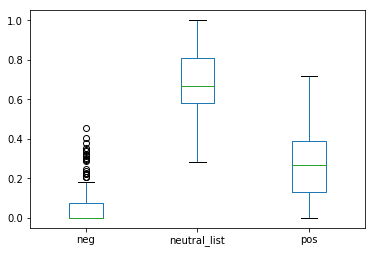

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({'pos':positive_list, 'neg':negative_list, 'neutral_list':neutral_list})
df.plot.box()
plt.show()

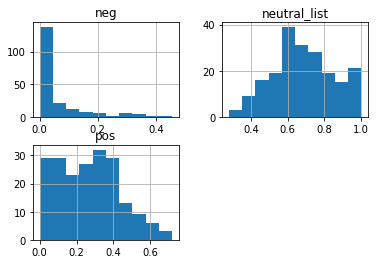

In [14]:
df.hist()
plt.show()